Data Science Excercise


Ly Thanh Hai - 102190061

1. Import library

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

2. Load datasets


In [36]:
data = pd.read_csv('../State/Nobel/complete.csv')
data.head()

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,Unnamed: 52
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN,NaN


In [37]:
# xoa cac truong khong can thiet
data.drop(columns=['categoryFullName', 'org_founded_continent' , 'org_founded_country', 'prizeStatus','motivation','categoryTopMotivation','award_link','knownName','givenName','familyName','fullName','penName','laureate_link','birth_cityNow','birth_countryNow','orgName','birth_locationString','death_city','death_cityNow','death_continent','death_country','death_countryNow','death_locationString','nativeName','acronym','org_founded_cityNow','org_founded_countryNow','org_founded_locationString','residence_1','residence_2','affiliation_1','affiliation_2','affiliation_3','affiliation_4','birth_city','org_founded_city'],inplace=True)
data.isnull().sum()

awardYear                0
category                 0
sortOrder                0
portion                  0
prizeAmount              0
prizeAmountAdjusted      0
dateAwarded            417
id                       0
name                     0
gender                  29
birth_date              27
birth_continent         27
birth_country           27
death_date             318
org_founded_date       924
ind_or_org               3
Unnamed: 52            949
dtype: int64

In [38]:
# thay the du lieu trong bang gia tri organization
data['gender'] = data['gender'].replace(np.nan, 'organization')

In [39]:
data.birth_date.fillna(data.org_founded_date, inplace= True)
del data['org_founded_date']

In [40]:
data['birth_date'].isna().sum()

1

In [41]:
data[data['birth_date'].isna()]

,awardYear,category,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,id,name,gender,birth_date,birth_continent,birth_country,death_date,ind_or_org,Unnamed: 52
617,2015,Peace,1,1,8000000,8384572,2015-10-09,925,National Dialogue Quartet,organization,NaN,NaN,NaN,NaN,Organization,NaN


In [42]:
data['birth_date'] = data['birth_date'].replace(np.nan, 'not specified')

In [43]:
data['birth_country'] = data['birth_country'].replace(np.nan, 'not specified')

In [44]:
data['dateAwarded'] = data['dateAwarded'].replace(np.nan, 'not specified')

In [45]:
data

,awardYear,category,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,id,name,gender,birth_date,birth_continent,birth_country,death_date,ind_or_org,Unnamed: 52
0,2001,Economic Sciences,2,1/3,10000000,12295082,2001-10-10,745,A. Michael Spence,male,1943-00-00,North America,USA,NaN,Individual,NaN
1,1975,Physics,1,1/3,630000,3404179,1975-10-17,102,Aage N. Bohr,male,1922-06-19,Europe,Denmark,2009-09-08,Individual,NaN
2,2004,Chemistry,1,1/3,10000000,11762861,2004-10-06,779,Aaron Ciechanover,male,1947-10-01,Asia,British Protectorate of Palestine,NaN,Individual,NaN
3,1982,Chemistry,1,1,1150000,3102518,1982-10-18,259,Aaron Klug,male,1926-08-11,Europe,Lithuania,2018-11-20,Individual,NaN
4,1979,Physics,2,1/3,800000,2988048,1979-10-15,114,Abdus Salam,male,1926-01-29,Asia,India,1996-11-21,Individual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,1,1/3,480000,3345725,not specified,66,John Bardeen,male,1908-05-23,North America,USA,1991-01-30,Individual,NaN
946,1954,Chemistry,1,1,181647,2640218,not specified,217,Linus Pauling,male,1901-02-28,North America,USA,1994-08-19,Individual,NaN
947,1911,Chemistry,1,1,140695,7327865,not specified,6,Marie Curie,female,1867-11-07,Europe,Russian Empire,1934-07-04,Individual,NaN
948,1981,Peace,1,1,1000000,2929688,1981-10-14,515,Office of the United Nations High Commissioner...,organization,1951-00-00,NaN,not specified,NaN,Organization,NaN


3. Calculate age 

In [46]:
def checkValidDate(dataItem, format):
    try:
        datetime.datetime.strptime(dataItem, format)
        return 1
    except ValueError:
        return 0
# print(type(int(data["birth_date"][1].split("-")[0])) == str)
# print(checkValidDate(data["birth_date"][1], '%Y-%m-%d'))

def calculateAge(data):
    data_copy = data.copy()
    data_copy["Age"] = 0
    for i in range(len(data["dateAwarded"])):
        if checkValidDate(data["birth_date"][i], "%Y-%m-%d") == 1:
            data_copy["Age"][i] = int(data["awardYear"][i]) - int(data["birth_date"][i].split("-")[0])
        else:
            continue
    data_copy['Age'] = data_copy['Age'].replace(0, data_copy.Age.median())
    return data_copy
    

In [47]:
# Here you can see that there is no NaN value in any of the column
data = calculateAge(data)
data.isnull().sum()

/tmp/ipykernel_25453/2351164605.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy["Age"][i] = int(data["awardYear"][i]) - int(data["birth_date"][i].split("-")[0])


awardYear                0
category                 0
sortOrder                0
portion                  0
prizeAmount              0
prizeAmountAdjusted      0
dateAwarded              0
id                       0
name                     0
gender                   0
birth_date               0
birth_continent         27
birth_country            0
death_date             318
ind_or_org               3
Unnamed: 52            949
Age                      0
dtype: int64

4. Remove Outliers


<AxesSubplot:>

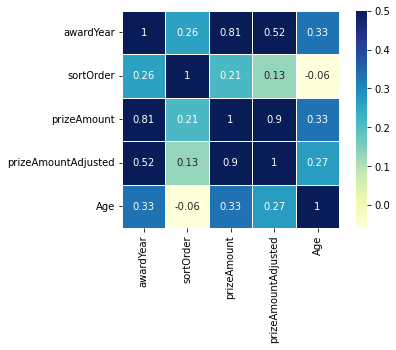

In [48]:
corr = data.corr().round(2)
mask = np.zeros_like(corr)
sns.heatmap(corr, mask=mask, vmax=0.5, square=True, annot=True, cmap="YlGnBu", linewidths=.6)

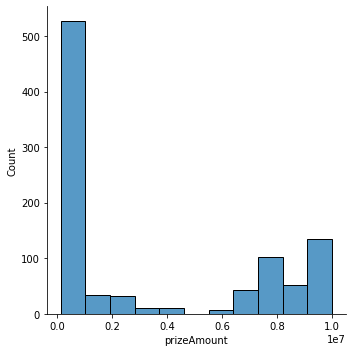

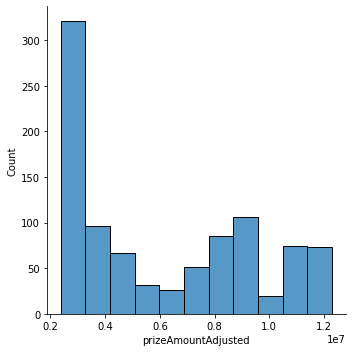

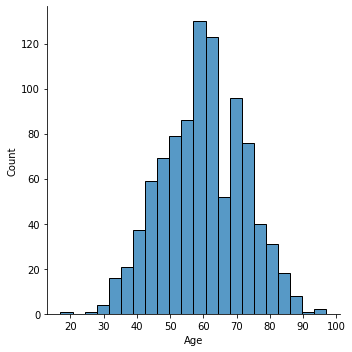

In [49]:
sns.displot(data= data["prizeAmount"])
plt.show()
sns.displot(data= data["prizeAmountAdjusted"])
plt.show()
sns.displot(data= data["Age"])
plt.show()

In [50]:
#2 Xu ly du lieu ngoai le prizeAmount
def removeOutliersPrizeAmount(df):
    Q3 = np.quantile(data["prizeAmount"], 0.75)
    Q1 = np.quantile(data["prizeAmount"], 0.25)
    IQR = Q3 - Q1
    sideTop = Q3 + 3 * IQR
    sideBot = Q1 - 3 * IQR

    arrayPrizeAmount = []
    for i in range(0, len(df["prizeAmount"])):
        if df["prizeAmount"][i] < sideBot:
            arrayPrizeAmount.append(sideBot)
        elif df["prizeAmount"][i] > sideTop:
            arrayPrizeAmount.append(sideTop)
        else:
            arrayPrizeAmount.append(df["prizeAmount"][i])
    df["prizeAmount"] = arrayPrizeAmount  
    return df

data = removeOutliersPrizeAmount(data)

#2 Xu ly du lieu ngoai le prizeAmountAdjusted
def removeOutliersPrizeAmount(df):
    Q3 = np.quantile(data["prizeAmountAdjusted"], 0.75)
    Q1 = np.quantile(data["prizeAmountAdjusted"], 0.25)
    IQR = Q3 - Q1
    sideTop = Q3 + 3 * IQR
    sideBot = Q1 - 3 * IQR

    arrayPrizeAmountAdjusted = []
    for i in range(0, len(df["prizeAmountAdjusted"])):
        if df["prizeAmountAdjusted"][i] < sideBot:
            arrayPrizeAmountAdjusted.append(sideBot)
        elif df["prizeAmountAdjusted"][i] > sideTop:
            arrayPrizeAmountAdjusted.append(sideTop)
        else:
            arrayPrizeAmountAdjusted.append(df["prizeAmountAdjusted"][i])
    df["prizeAmountAdjusted"] = arrayPrizeAmountAdjusted  
    return df

data = removeOutliersPrizeAmount(data)

# 2 Xu ly du lieu ngoai le Age
# Age la phan bo chuan 
def removeOutliersAge(df):
    average = np.average(df["Age"])
    std = np.std(df["Age"])
    sideTop = average + 3 * std
    sideBot = average - 3 * std
    arrayAge = []
    for i in range(0, len(df["Age"])):
        if df["Age"][i] < sideBot:
            arrayAge.append(sideBot)
        elif df["Age"][i] > sideTop:
            arrayAge.append(sideTop)
        else:
            arrayAge.append(df["Age"][i])
    df["Age"] = arrayAge  
    return df

data = removeOutliersAge(data)


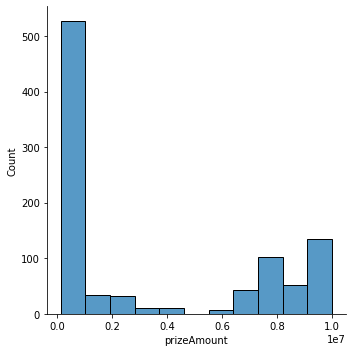

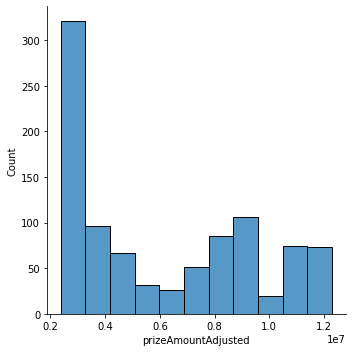

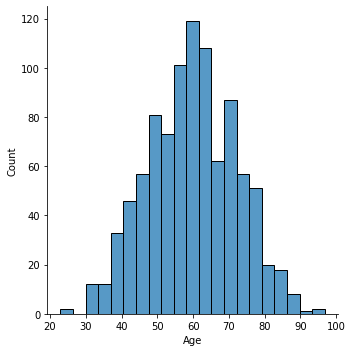

In [51]:
sns.displot(data= data["prizeAmount"])
plt.show()
sns.displot(data= data["prizeAmountAdjusted"])
plt.show()
sns.displot(data= data["Age"])
plt.show()

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator
from sklearn.preprocessing import MinMaxScaler

print(data.columns)
# def minMaxNormalization(data):
#     min_max = MinMaxScaler()
#     df_minmax = pd.DataFrame(min_max.fit_transform(data[["Age", 'prizeAmount', 'prizeAmountAdjusted', 'awardYear']]), columns = ["Age", 'prizeAmount', 'prizeAmountAdjusted', 'awardYear'])
#     return df_minmax

# data = minMaxNormalization(data)

def myLogisticRegression(df):
    X = df[["Age", 'prizeAmount', 'prizeAmountAdjusted', 'awardYear']]
    y = df['sortOrder']
    array = []
    for i in range(0, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

        logmodel = LogisticRegression()
        logmodel.fit(X_train, y_train)
        predictions = logmodel.predict(X_test)
        Accuracy_Score = accuracy_score(y_test, predictions)

        array.append(Accuracy_Score)

        
    return np.mean(array)

def myLogisticRegression_GridSearch(df):
    X = df[["Age", 'prizeAmount', 'prizeAmountAdjusted', 'awardYear']]
    y = df['sortOrder']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


    model = LogisticRegression()
    parameters = [
        {
            'C': np.logspace(-3 , 3, 7),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'max_iter': [50, 80, 100],
            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],

        },
    ]
    gscv = GridSearchCV(model, parameters, cv= 5, n_jobs= -1, scoring= "accuracy", return_train_score= True, error_score= 0, verbose= 3)
    gscv.fit(X_train, y_train)
    print("score: ",gscv.best_score_, sep= " ")
    print('best_params: ', gscv.best_params_, sep=" ")



MyLogisticRegression = myLogisticRegression(data)
print("Accuracy before using grid search: ", MyLogisticRegression * 100, "%", sep= " ")

# LogisticRegression().get_params().keys()

# LogisticRegression_GridSearch = myLogisticRegression_GridSearch(data)


Index(['Age', 'prizeAmount', 'prizeAmountAdjusted', 'awardYear'], dtype='object')


KeyError: 'sortOrder'

In [56]:
model = LogisticRegression(C= 0.1, max_iter= 80, penalty= 'l2', solver= 'newton-cg')
results = cross_validate(estimator= model, X= data[["Age", 'prizeAmount', 'prizeAmountAdjusted', 'awardYear']], y= data[["sortOrder"]], cv= 5)

In [55]:
accuracy = np.mean(results['test_score'])
print("Accuracy after using grid search: ", accuracy * 100, "%", sep= " ")

Accuracy after using grid search:  62.84210526315789 %


In [58]:
print(f"Improve is increase: {((accuracy - MyLogisticRegression) / MyLogisticRegression ) * 100}%")

Improve is increase: 1.3582342954159492%


Ket Luan: Lua chon bo tham so toi uu tu phuong phap grid search cho do chinh xac cao hon 1.36%